# Time-lapse 3D survey
To invert time-lapse survey there are two modes: `reg_mode == 1` or `reg_mode == 2` (see R3t documentation).
- `reg_mode == 1` is refered to as 'background constrained' inversion where the subsequente survey are penalized from departure from the reference survey.
- `reg_mode == 2` (default in ResIPy) is refered to as 'difference inversion' but, for 3D, this requires to modify the protocol.dat to compute $d - d_0 + f(m_0)$ where $d_0$ is the observed transfer resitance of the reference survey, $d$ is the observed transfer resistances of the survey to be inverted, $f(m_0)$ represent the forward response (in terms of transfer resistances) of the inverted reference model. While R2 and cR2 do `d-d0+f(m0)` internally, R3t does not. But ResIPy has this build-in, hence no special initiative is required from the user if you want to use `reg_mode == 2`. You will see the `--- Computing d-d0+f(m0) ---- ` when calling `Project.invert()`.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder
testdir = '../src/examples/'
from resipy import Project
import pyvista as pv # for 3D plots
import numpy as np # to specify np.infty

API path =  /media/jkl/data/phd/resipy/src/resipy
ResIPy version =  3.4.6
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
# difference inversion - see d-d0+f(m0) in the log
k = Project(typ='R3t')
k.createTimeLapseSurvey([testdir + 'dc-3d-timelapse-protocol/data/protocol3D-1.dat',
                         testdir + 'dc-3d-timelapse-protocol/data/protocol3D-2.dat'],
                         ftype='ProtocolDC')
k.importElec(testdir + 'dc-3d-timelapse-protocol/elec/electrodes3D-1.csv')
k.createMesh()
k.invert()
# by default `reg_mode == 2` (difference inversion)
print(k.param['reg_mode'])

Working directory is: /media/jkl/data/phd/resipy/src/resipy
clearing dirname
2/2 imported
Creating tetrahedral mesh...done (62877 elements)
Writing .in file and protocol.dat... Matching quadrupoles between pairs of (background, surveyX) for difference inversion...done in 0.00312s
done
------------ INVERTING REFERENCE SURVEY ---------------


 >> R 3 t     E R T    M o d e l    v 2.31 <<

 >> Date: 03-12-2023
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat                                                                        

 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l 

/media/jkl/data/phd/resipy/pyenv/lib/python3.10/site-packages/numpy/lib/function_base.py:2458: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = asanyarray(outputs, dtype=otypes[0])




 >> R 3 t     E R T    M o d e l    v 2.31 <<

 >> Date: 03-12-2023
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from Start_res.dat                                                                   

 >> L o g - D a t a   I n v e r s i o n <<
 >> D i f f e r e n c e   R e g u l a r i s a t i o n <<

 >> Memory estimates:
    For   1000 measurements the memory needed is:          0.521 Gb
    For   2000 measurements the memory needed is:          1.024 Gb
    For   5000 measurements the memory needed is:          2.534 Gb
    For  10000 measurements the memory needed is:          5.049 Gb

 >> Forming rough

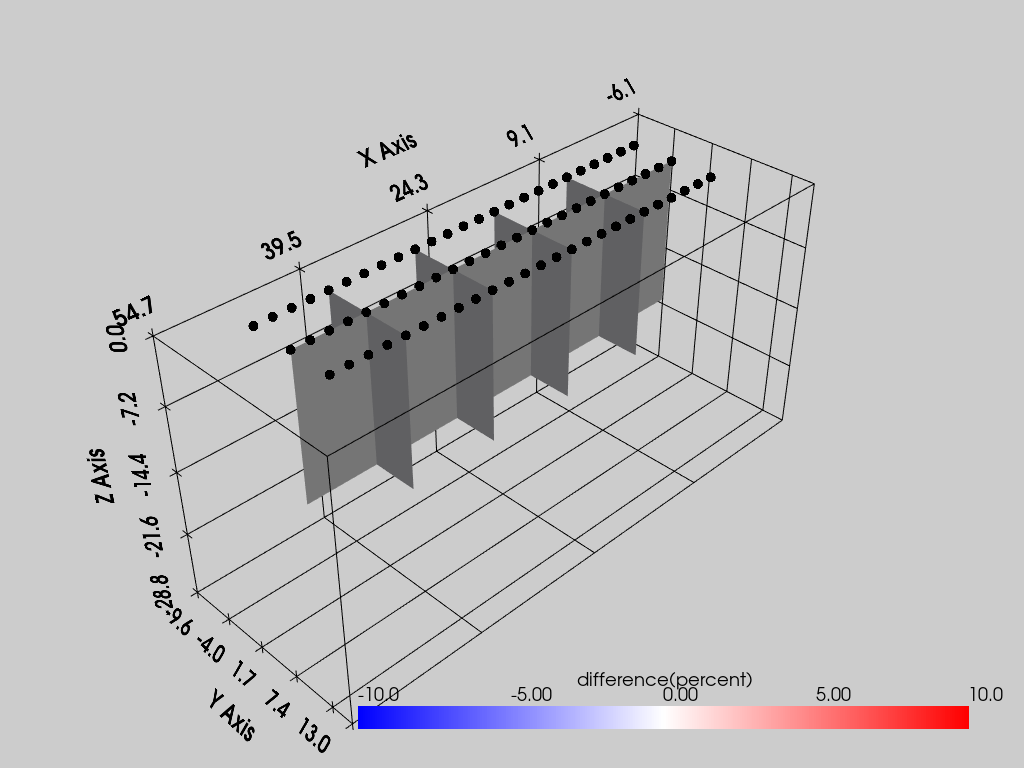

In [3]:
k.showResults(index=1, pvslices=[[10,20,30,40],[0],[]], attr='difference(percent)',
             color_map='bwr', vmin=-10, vmax=10)

In background constrained inversion (`reg_mode == 1`), the `difference(percent)` attribute is not computed by R3t. In order to have it computed by ResIPy, it is needed to tell R3t to output the full mesh (so that ResIPy can match the mesh elements between reference and other surveys). To do this set `Project.param['num_xy_poly'] = 0` and set `zmin` and `zmax` to $-\infty$ and $+\infty$ respectively, just before `Project.invert()`. If you don't change that, R3t will crop the mesh by default and ResIPy will output a message saying it couldn't compute 'difference(percent)'.

Note that setting `num_xy_poly` to 0 and changing `zmin`/`zmax` does not change the vizualisation. It just changes the .vtk and .dat files produced by R3t.

In [4]:
# background constrained - see d-d0+f(m0) in the log
k = Project(typ='R3t')
k.createTimeLapseSurvey([testdir + 'dc-3d-timelapse-protocol/data/protocol3D-1.dat',
                         testdir + 'dc-3d-timelapse-protocol/data/protocol3D-2.dat'],
                         ftype='ProtocolDC')
k.importElec(testdir + 'dc-3d-timelapse-protocol/elec/electrodes3D-1.csv')
k.createMesh()
k.param['reg_mode'] = 1
k.param['num_xy_poly'] = 0 # tells R3t to no crop the mesh
k.param['zmin'] = -np.inf
k.param['zmax'] = np.inf
k.invert()

Working directory is: /media/jkl/data/phd/resipy/src/resipy
clearing dirname
2/2 imported
Creating tetrahedral mesh...done (62877 elements)
Writing .in file and protocol.dat... done
------------ INVERTING REFERENCE SURVEY ---------------


 >> R 3 t     E R T    M o d e l    v 2.31 <<

 >> Date: 03-12-2023
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat                                                                        

 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<

 >> Memory estimates:
    For   1000 measurements the memory needed is:          0

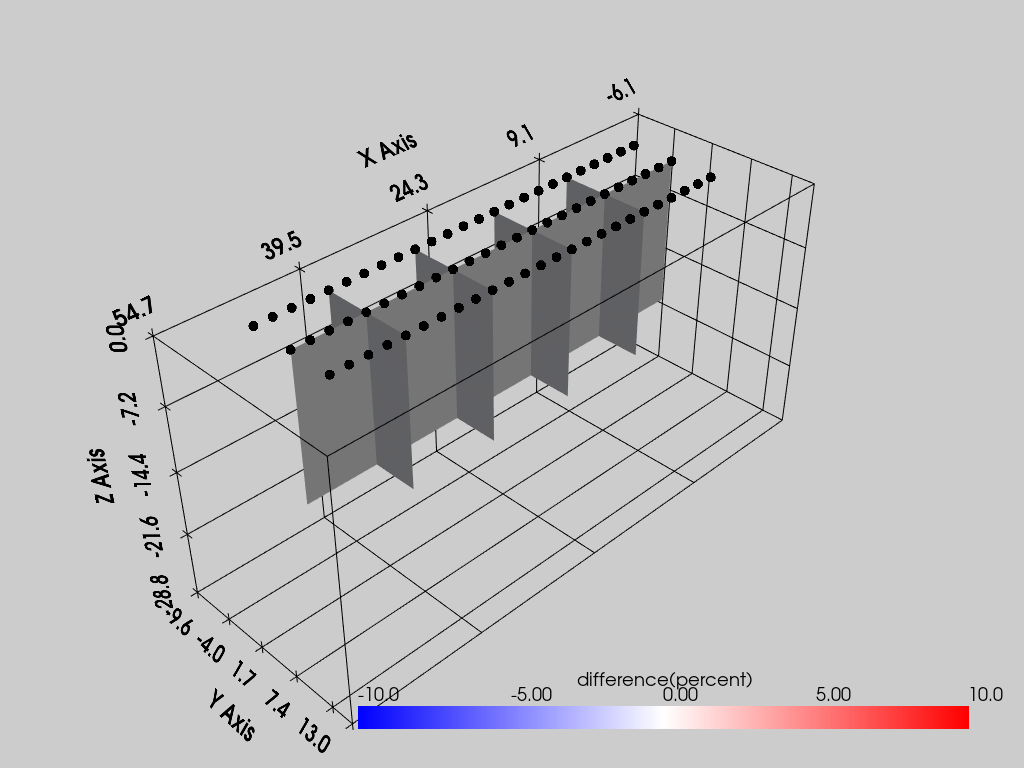

In [5]:
k.showResults(index=1, pvslices=[[10,20,30,40],[0],[]], attr='difference(percent)',
             color_map='bwr', vmin=-10, vmax=10)

Note that the two outputs are slightly different. With the difference inversion (`reg_mode == 2`) being smoother thant the background constrained (`reg_mode == 1`). Indeed, in this last one, we haven't inverted the differences in resistivity and the `difference(percent)` argument has been computed afterwards by ResIPy.